# Data Structures & Algorithms Chapter 5 Array-Based Sequences
## Donovan Manogue

### Reinforcement Exercises R4.1-4.8

### Code Fragments from this chapter!

CodeFragment5.1: An experiment to explore the relationship between a list’s
 length and its under lying size in Python

In [5]:
import sys  # provides getsizeof function

data = []
n = 30  # <- you can change this number to explore further

for k in range(n):
    a = len(data)                  # number of elements in list
    b = sys.getsizeof(data)        # size in bytes of the list object
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)              # increase length by one (placeholder)
# Code Fragment 2 is the output below

Length:   0; Size in bytes:   56
Length:   1; Size in bytes:   88
Length:   2; Size in bytes:   88
Length:   3; Size in bytes:   88
Length:   4; Size in bytes:   88
Length:   5; Size in bytes:  120
Length:   6; Size in bytes:  120
Length:   7; Size in bytes:  120
Length:   8; Size in bytes:  120
Length:   9; Size in bytes:  184
Length:  10; Size in bytes:  184
Length:  11; Size in bytes:  184
Length:  12; Size in bytes:  184
Length:  13; Size in bytes:  184
Length:  14; Size in bytes:  184
Length:  15; Size in bytes:  184
Length:  16; Size in bytes:  184
Length:  17; Size in bytes:  248
Length:  18; Size in bytes:  248
Length:  19; Size in bytes:  248
Length:  20; Size in bytes:  248
Length:  21; Size in bytes:  248
Length:  22; Size in bytes:  248
Length:  23; Size in bytes:  248
Length:  24; Size in bytes:  248
Length:  25; Size in bytes:  312
Length:  26; Size in bytes:  312
Length:  27; Size in bytes:  312
Length:  28; Size in bytes:  312
Length:  29; Size in bytes:  312


Code Fragment 5.3: An implementation of a DynamicArray class, using a raw array from the ctypes module as storage

In [8]:
# Code Fragment 5.3: An implementation of a DynamicArray class,
# using a raw array from the ctypes module as storage

import ctypes  # provides low-level arrays

class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""

    def __init__(self):
        """Create an empty array."""
        self.n = 0                      # Count actual elements
        self.capacity = 1              # Default array capacity
        self.A = self._make_array(self.capacity)  # Low-level array

    def __len__(self):
        """Return number of elements stored in the array."""
        return self.n

    def __getitem__(self, k):
        """Return element at index k."""
        if not 0 <= k < self.n:
            raise IndexError('invalid index')
        return self.A[k]  # Retrieve from array

    def append(self, obj):
        """Add object to end of the array."""
        if self.n == self.capacity:           # Not enough room
            self._resize(2 * self.capacity)   # So double capacity
        self.A[self.n] = obj
        self.n += 1

    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_


Code Fragment 5.4: Measuring the amortized cost of append for Python’s list class

In [11]:
# Code Fragment 5.4: Measuring the amortized cost of append for Python’s list class.

from time import time

def compute_average(n):
    """Perform n appends to an empty list and return average time elapsed."""
    
    data = []
    start = time()                 # Record the start time (in seconds)
    
    for k in range(n):
        data.append(None)         # Append operation
    
    end = time()                   # Record the end time (in seconds)
    
    return (end - start) / n      # Compute average time per operation


Code Fragment 5.5: Implementation of insert for our DynamicArray class

In [ ]:
# Code Fragment 5.5: Implementation of insert for our DynamicArray class.

def insert(self, k, value):
    """Insert value at index k, shifting subsequent values rightward.
    (For simplicity, we assume 0 <= k <= n in this version.)
    """
    if self.n == self.capacity:             # Not enough room
        self._resize(2 * self.capacity)     # So double capacity
    
    for j in range(self.n, k, -1):          # Shift rightmost elements first
        self.A[j] = self.A[j - 1]
    
    self.A[k] = value                       # Store new element
    self.n += 1


Code Fragment 5.6: Implementation of remove for our DynamicArray class.

In [16]:
# Code Fragment 5.6: Implementation of remove for our DynamicArray class.

def remove(self, value):
    """Remove first occurrence of value (or raise ValueError).
    Note: we do not consider shrinking the dynamic array in this version.
    """
    for k in range(self.n):
        if self.A[k] == value:  # Found a match!
            for j in range(k, self.n - 1):  # Shift others to fill the gap
                self.A[j] = self.A[j + 1]
            self.A[self.n - 1] = None       # Help garbage collection
            self.n -= 1                    # We have one less item
            return                         # Exit immediately
    raise ValueError("value not found")    # Only reached if no match


Code Fragment 5.7: Python code for a simple GameEntry class

In [19]:
# Code Fragment 5.7: Python code for a simple GameEntry class.
# We include methods for returning the name and score for a game entry object,
# as well as a method for returning a string representation of this entry.

class GameEntry:
    """Represents one entry of a list of high scores."""

    def __init__(self, name, score):
        self.name = name
        self.score = score

    def get_name(self):
        return self.name

    def get_score(self):
        return self.score

    def __str__(self):
        return "({0}, {1})".format(self.name, self.score)  # e.g., (Bob, 98)


Code Fragment 5.8: Python code for a Scoreboard class that maintains

In [ ]:
# Code Fragment 5.8: Python code for a Scoreboard class that maintains
# an ordered series of scores as GameEntry objects.

class Scoreboard:
    """Fixed-length sequence of high scores in non-increasing order."""

    def __init__(self, capacity=10):
        """Initialize scoreboard with given maximum capacity.
        
        All entries are initially None.
        """
        self.board = [None] * capacity   # reserve space for future scores
        self.n = 0                       # number of actual entries

    def __getitem__(self, k):
        """Return entry at index k."""
        return self.board[k]

    def __str__(self):
        """Return string representation of the high score list."""
        return '\n'.join(str(self.board[j]) for j in range(self.n))

    def add(self, entry):
        """Consider adding entry to high scores."""
        score = entry.get_score()

        # Does the new entry qualify as a high score?
        # Yes if board not full or score is higher than the last entry
        good = self.n < len(self.board) or score > self.board[self.n - 1].get_score()

        if good:
            if self.n < len(self.board):    # no score drops from list
                self.n += 1                 # so overall number increases

            # shift lower scores rightward to make room for new entry
            j = self.n - 1
            while j > 0 and self.board[j - 1].get_score() < score:
                self.board[j] = self.board[j - 1]  # shift entry from j-1 to j
                j -= 1                             # and decrement j
            self.board[j] = entry                  # when done, add new entry


Code Fragment 5.9: High-level description of the insertion-sort algorithm

 Algorithm InsertionSort(A):
 Input: An array A of n comparable elements
 Output: The array A with elements rearranged in nondecreasing order
 for k from 1 to n − 1 do
 Insert A[k] at its proper location within A[0], A[1], ..., A[k].
 Code Fragment 5.9: High-level description of the insertion-sort algorithm

Code Fragment 5.10: Python code for performing insertion-sort on a list

In [25]:
# Code Fragment 5.10: Python code for performing insertion-sort on a list

def insertion_sort(A):
    """Sort list of comparable elements into nondecreasing order."""

    for k in range(1, len(A)):            # from 1 to n-1
        cur = A[k]                        # current element to be inserted
        j = k
        while j > 0 and A[j - 1] > cur:   # find correct index j for current
            A[j] = A[j - 1]               # shift A[j-1] one step to the right
            j -= 1
        A[j] = cur                        # cur is now in the right place


Code Fragment 5.11: A complete Python class for the Caesar cipher.

In [28]:
# Code Fragment 5.11: A complete Python class for the Caesar cipher.

class CaesarCipher:
    """Class for doing encryption and decryption using a Caesar cipher."""

    def __init__(self, shift):
        """Construct Caesar cipher using given integer shift for rotation."""
        encoder = [None] * 26  # temp array for encryption
        decoder = [None] * 26  # temp array for decryption

        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord('A'))
            decoder[k] = chr((k - shift) % 26 + ord('A'))

        self.forward = ''.join(encoder)   # store as string
        self.backward = ''.join(decoder)  # store as string

    def encrypt(self, message):
        """Return string representing encrypted message."""
        return self.transform(message, self.forward)

    def decrypt(self, secret):
        """Return decrypted message given encrypted secret."""
        return self.transform(secret, self.backward)

    def transform(self, original, code):
        """Utility to perform transformation based on given code string."""
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')  # index from 0 to 25
                msg[k] = code[j]            # replace this character
        return ''.join(msg)


Code Fragment 5.12: A simple test for our TicTacToe class.

In [31]:
# Code Fragment 5.12: A simple test for our TicTacToe class.

game = TicTacToe()

# X moves:       O moves:
game.mark(1, 1); game.mark(0, 2)
game.mark(2, 2); game.mark(0, 0)
game.mark(0, 1); game.mark(2, 1)
game.mark(1, 2); game.mark(1, 0)
game.mark(2, 0)

print(game)  # Display current board

winner = game.winner()

if winner is None:
    print("Tie")
else:
    print(winner, "wins")


NameError: name 'TicTacToe' is not defined

In [ ]:
 Code Fragment 5.13: A complete Python class for managing a Tic-Tac-Toe game.

In [35]:
# Code Fragment 5.13: A complete Python class for managing a Tic-Tac-Toe game.

class TicTacToe:
    """Management of a Tic-Tac-Toe game (does not do strategy)."""

    def __init__(self):
        """Start a new game."""
        self.board = [[" "] * 3 for j in range(3)]  # 3x3 board filled with spaces
        self.player = "X"  # X always starts

    def mark(self, i, j):
        """Put an X or O mark at position (i, j) for the next player's turn."""
        if not (0 <= i <= 2 and 0 <= j <= 2):
            raise ValueError("Invalid board position")
        if self.board[i][j] != " ":
            raise ValueError("Board position occupied")
        if self.winner() is not None:
            raise ValueError("Game is already complete")
        
        self.board[i][j] = self.player

        # Switch player
        self.player = "O" if self.player == "X" else "X"

    def is_win(self, mark):
        """Check whether the board configuration is a win for the given player."""
        board = self.board  # shorthand alias
        return (
            (mark == board[0][0] == board[0][1] == board[0][2]) or  # row 0
            (mark == board[1][0] == board[1][1] == board[1][2]) or  # row 1
            (mark == board[2][0] == board[2][1] == board[2][2]) or  # row 2
            (mark == board[0][0] == board[1][0] == board[2][0]) or  # col 0
            (mark == board[0][1] == board[1][1] == board[2][1]) or  # col 1
            (mark == board[0][2] == board[1][2] == board[2][2]) or  # col 2
            (mark == board[0][0] == board[1][1] == board[2][2]) or  # diagonal
            (mark == board[0][2] == board[1][1] == board[2][0])     # reverse diagonal
        )

    def winner(self):
        """Return mark of winning player, or None to indicate a tie or ongoing game."""
        for mark in "XO":
            if self.is_win(mark):
                return mark
        return None

    def __str__(self):
        """Return string representation of current game board."""
        rows = [" | ".join(self.board[r]) for r in range(3)]
        return "\n-----\n".join(rows)


### Exercises


**R-5.1** Execute the experiment from Code Fragment 5.1 and compare the results on your system to those we report in Code Fragment 5.2.

In [98]:
import sys  # provides getsizeof function

data = []
n = 30  # <- you can change this number to explore further

for k in range(n):
    a = len(data)                  # number of elements in list
    b = sys.getsizeof(data)        # size in bytes of the list object
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)              # increase length by one (placeholder)

Length:   0; Size in bytes:   56
Length:   1; Size in bytes:   88
Length:   2; Size in bytes:   88
Length:   3; Size in bytes:   88
Length:   4; Size in bytes:   88
Length:   5; Size in bytes:  120
Length:   6; Size in bytes:  120
Length:   7; Size in bytes:  120
Length:   8; Size in bytes:  120
Length:   9; Size in bytes:  184
Length:  10; Size in bytes:  184
Length:  11; Size in bytes:  184
Length:  12; Size in bytes:  184
Length:  13; Size in bytes:  184
Length:  14; Size in bytes:  184
Length:  15; Size in bytes:  184
Length:  16; Size in bytes:  184
Length:  17; Size in bytes:  248
Length:  18; Size in bytes:  248
Length:  19; Size in bytes:  248
Length:  20; Size in bytes:  248
Length:  21; Size in bytes:  248
Length:  22; Size in bytes:  248
Length:  23; Size in bytes:  248
Length:  24; Size in bytes:  248
Length:  25; Size in bytes:  312
Length:  26; Size in bytes:  312
Length:  27; Size in bytes:  312
Length:  28; Size in bytes:  312
Length:  29; Size in bytes:  312


**R-5.2** In Code Fragment 5.1, we perform an experiment to compare the length of a Python list to its underlying memory usage. Determining the sequence of array sizes requires a manual inspection of the output of that program. Redesign the experiment so that the program outputs only those values of `k` at which the existing capacity is exhausted. For example, on a system consistent with the results of Code Fragment 5.2, your program should output that the sequence of array capacities are 0, 4, 8, 16, 25, ....

In [100]:
import sys

data = []
prev_size = sys.getsizeof(data)  # initial memory size

print(f"Length: {len(data):3d}; Size in bytes: {prev_size}")

for k in range(100):  # you can increase the range as needed
    data.append(None)
    curr_size = sys.getsizeof(data)
    if curr_size != prev_size:
        print(f"Length: {len(data):3d}; Size in bytes: {curr_size}")
        prev_size = curr_size


Length:   0; Size in bytes: 56
Length:   1; Size in bytes: 88
Length:   5; Size in bytes: 120
Length:   9; Size in bytes: 184
Length:  17; Size in bytes: 248
Length:  25; Size in bytes: 312
Length:  33; Size in bytes: 376
Length:  41; Size in bytes: 472
Length:  53; Size in bytes: 568
Length:  65; Size in bytes: 664
Length:  77; Size in bytes: 792
Length:  93; Size in bytes: 920


**R-5.3** Modify the experiment from Code Fragment 5.1 in order to demonstrate that Python’s list class occasionally shrinks the size of its underlying array when elements are popped from a list.

In [102]:
import sys

data = [None] * 100  # start with a full list of 100 elements
prev_size = sys.getsizeof(data)

print(f"Initial Length: {len(data):3d}; Size in bytes: {prev_size}")

for k in range(100):
    data.pop()
    curr_size = sys.getsizeof(data)
    if curr_size != prev_size:
        print(f"Length: {len(data):3d}; Size in bytes: {curr_size}")
        prev_size = curr_size


Initial Length: 100; Size in bytes: 856
Length:  49; Size in bytes: 536
Length:  29; Size in bytes: 344
Length:  17; Size in bytes: 248
Length:  11; Size in bytes: 184
Length:   7; Size in bytes: 152
Length:   5; Size in bytes: 120
Length:   1; Size in bytes: 88
Length:   0; Size in bytes: 56


**R-5.4** Our `DynamicArray` class, as given in Code Fragment 5.3, does not support use of negative indices with `__getitem__`. Update that method to better match the semantics of a Python list.

In [114]:
import ctypes

class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""

    def __init__(self):
        self.n = 0                      # count actual elements
        self.capacity = 1              # default array capacity
        self.A = self._make_array(self.capacity)

    def __len__(self):
        return self.n

    def __getitem__(self, k):
        """Return element at index k (supports negative indexing)."""
        if k < 0:
            k += self.n  # convert negative index
        if not 0 <= k < self.n:
            raise IndexError('invalid index')
        return self.A[k]

    def append(self, obj):
        if self.n == self.capacity:
            self._resize(2 * self.capacity)
        self.A[self.n] = obj
        self.n += 1

    def _resize(self, c):
        B = self._make_array(c)
        for k in range(self.n):
            B[k] = self.A[k]
        self.A = B
        self.capacity = c

    def _make_array(self, c):
        return (c * ctypes.py_object)()


# ✅ TESTING NEGATIVE INDEX SUPPORT
arr = DynamicArray()
for i in range(5):
    arr.append(i * 10)

print(arr[0])    # 0
print(arr[-1])   # 40
print(arr[-2])   # 30
 # 30
.A[k]


SyntaxError: invalid syntax (3117137099.py, line 48)

**R-5.5** Redo the justification of Proposition 5.1 assuming that the cost of growing the array from size `k` to size `2k` is **3k** cyber-dollars. How much should each `append` operation be charged to make the amortization work?

To cover the higher 3k resize cost, each append() should be charged 4 cyber-dollars in the amortized model.

**R-5.6** Our implementation of `insert` for the `DynamicArray` class, as given in Code Fragment 5.5, has the following inefficiency. In the case when a resize occurs, the resize operation takes time to copy all the elements from an old array to a new array, and then the subsequent loop in the body of `insert` shifts many of those elements. Give an improved implementation of the `insert` method, so that, in the case of a resize, the elements are shifted into their final position during that operation, thereby avoiding the subsequent shifting.

In [117]:
def insert(self, k, value):
    """Insert value at index k, shifting subsequent values rightward.

    If resize is needed, do shifting during resizing.
    """
    if self.n == self.capacity:
        # Allocate larger array and shift during copy
        new_capacity = 2 * self.capacity
        B = self._make_array(new_capacity)

        for j in range(k):         # copy elements before k
            B[j] = self.A[j]
        B[k] = value               # insert new item at position k
        for j in range(k, self.n): # shift the rest right by one
            B[j + 1] = self.A[j]

        self.A = B
        self.capacity = new_capacity
    else:
        # No resize needed; shift in-place
        for j in range(self.n, k, -1):  # shift rightward
            self.A[j] = self.A[j - 1]
        self.A[k] = value

    self.n += 1


**R-5.7** Let `A` be an array of size `n ≥ 2` containing integers from 1 to `n−1`, inclusive, with exactly one repeated. Describe a fast algorithm for finding the integer in `A` that is repeated.

Use the sum difference method:
Return sum(A) - (n−1)·n/2 to find the repeated value in O(n) time and O(1) space.

**R-5.8** Experimentally evaluate the efficiency of the `pop` method of Python’s list class when using varying indices as a parameter, as we did for `insert` on page 205. Report your results akin to Table 5.5.

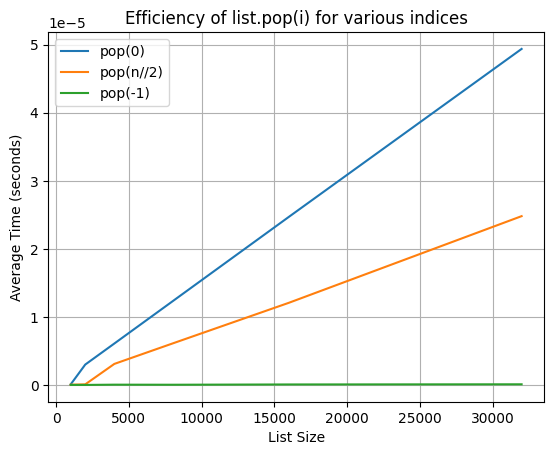

In [120]:
import time
import matplotlib.pyplot as plt

def time_pop(index_func, size=10000, trials=100):
    times = []
    for _ in range(trials):
        data = list(range(size))
        index = index_func(len(data))
        start = time.perf_counter()
        data.pop(index)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / trials

# Index strategies
pop_end = lambda n: -1
pop_start = lambda n: 0
pop_middle = lambda n: n // 2

# Run experiments
sizes = [1000, 2000, 4000, 8000, 16000, 32000]
results = {
    "pop(0)": [],
    "pop(n//2)": [],
    "pop(-1)": []
}

for size in sizes:
    results["pop(0)"].append(time_pop(pop_start, size))
    results["pop(n//2)"].append(time_pop(pop_middle, size))
    results["pop(-1)"].append(time_pop(pop_end, size))

# Plot results
for label, times in results.items():
    plt.plot(sizes, times, label=label)

plt.xlabel("List Size")
plt.ylabel("Average Time (seconds)")
plt.title("Efficiency of list.pop(i) for various indices")
plt.legend()
plt.grid(True)
plt.show()


**R-5.9** Explain the changes that would have to be made to the program of Code Fragment 5.11 so that it could perform the Caesar cipher for messages that are written in an alphabet-based language other than English, such as Greek, Russian, or Hebrew.

To support non-English languages in the Caesar cipher (like Greek or Russian), you must replace the hardcoded English alphabet with a custom character list for the target language and update the shift logic to use the length of that alphabet. Instead of using ASCII arithmetic, build encoder/decoder maps based on character positions within the new alphabet.


**R-5.10** The constructor for the `CaesarCipher` class in Code Fragment 5.11 can be implemented with a two-line body by building the forward and backward strings using a combination of the `join` method and an appropriate comprehension syntax. Give such an implementation.

In [122]:
def __init__(self, shift):
    self.forward = ''.join([chr((k + shift) % 26 + ord('A')) for k in range(26)])
    self.backward = ''.join([chr((k - shift) % 26 + ord('A')) for k in range(26)])


**R-5.11** Use standard control structures to compute the sum of all numbers in an `n × n` data set, represented as a list of lists.

In [124]:
def sum_nested_list(data):
    total = 0
    for row in data:
        for value in row:
            total += value
    return total


**R-5.12** Describe how the built-in `sum` function can be combined with Python’s comprehension syntax to compute the sum of all numbers in an `n × n` data set, represented as a list of lists.

In [128]:
total = sum(val for row in data for val in row)
